In [41]:
from ad99 import AlexanderDunkerton1999
import numpy as np 
import matplotlib.pyplot as plt 
import xarray as xr 
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [13]:
GCLOUD_ERA5 = 'gs://gcp-public-data-arco-era5/ar/full_37-1h-0p25deg-chunk-1.zarr-v3'

In [63]:
loon_mask = xr.open_dataset('data/loon_masks.nc')
loon_mask['lon'] = (loon_mask.lon + 360) % 360 
loon_mask=loon_mask.sortby('lon')

In [57]:
ds = xr.open_dataset(GCLOUD_ERA5,engine='zarr',chunks=None,
    storage_options=dict(token='anon'),)

In [104]:
loon_mask_interp = loon_mask.interp(lat=ds.latitude.values,lon=ds.longitude.values,method='nearest')
loon_mask_interp = loon_mask_interp.rename({'lat':'latitude','lon':'longitude'})

In [102]:
ds_subset = ds[['u_component_of_wind','v_component_of_wind','temperature','geopotential']]

In [103]:
ds_subset = ds_subset.sel(time=slice(ds.valid_time_start,ds.valid_time_stop))

/Users/robcking/miniconda3/envs/loon_gw/lib/python3.12/site-packages/shapely/constructive.py:180: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/robcking/miniconda3/envs/loon_gw/lib/python3.12/site-packages/shapely/constructive.py:180: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/robcking/miniconda3/envs/loon_gw/lib/python3.12/site-packages/shapely/constructive.py:180: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(


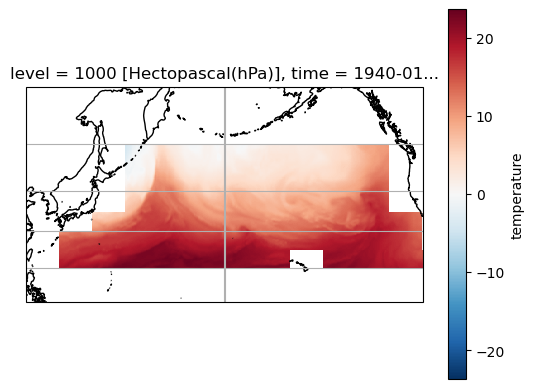

In [112]:
ax = plt.axes(projection=ccrs.Mercator(central_longitude=180))
(ds_subset.temperature.isel(time=10,level=-1).where(loon_mask_interp.extratropical_pacific) - 273.15).plot.pcolormesh(ax=ax,transform=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()
ax.set_extent([120, 240, 10, 60], crs=ccrs.PlateCarree())


In [129]:
for year in range(1940,2025):
    ds_year = ds_subset.sel(time=ds_subset.time.dt.year==year)
    for month in range(1,13):
        ds_month = ds_year.sel(time=ds_year.time.dt.month==month)
        break
    break

In [132]:
ds_month_extra = ds_month.where(loon_mask_interp.extratropical_pacific)

KeyboardInterrupt: 

In [ ]:
X